In [1]:
import numpy as np
import pandas as pd

In [2]:
comp_data= pd.read_csv('data/comparison.csv')
comp_data


,Critère,🏠 AmesHousing,🧑 Adult (Census Income),🩺 WDBC (Breast Cancer Diagnostic)
0,Source,Kaggle (Dean De Cock),Kaggle / UCI ML (US Census),UCI ML / Kaggle (Dr. Wolberg)
1,Domaine,Immobilier / Économie,Socio-démographique / Économie,Médical / Biologique
2,Tâche ML,Régression,Classification Binaire,Classification Binaire
3,Target,"SalePrice (Continu, $)",Income (>50K ou ≤50K),Diagnosis (Maligne ou Bénigne)
4,Taille (Observations),≈2930,≈48842,569 (Petit)
5,Nombre de Features,≈80,≈15,30
6,Type de Features,Numériques et Catégorielles (Ordinales et Nomi...,Numériques et Catégorielles,Exclusivement Numériques (Réel)
7,Valeurs Manquantes,"Oui, significatives et complexes","Oui, mais gérables (? pour certaines catégories)",Non (Très Propre)
8,Pré-traitement Clé,"Imputation, Feature Engineering, Transformatio...","Encodage Catégoriel, Gestion des ?",Normalisation/Standardisation des features num...
9,Performance Baseline,Erreur Quadratique Moyenne (RMSE),"Précision, F1-Score","Précision (Accuracy), Recall/Sensitivity"


In [3]:
datasets = {
    'AmesHousing': pd.read_csv('./data/preprocessed/AmesHousing.csv'), # target= SalePrice
    'adult': pd.read_csv('./data/preprocessed/adult.csv'),
    'wdbc': pd.read_csv('./data/preprocessed/wdbc.csv'),
}



In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor
)
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, SVR

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

models_reg ={
    # Modèles Linéaires (Régularisés)
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0, random_state=42),
    'Lasso': Lasso(alpha=0.1, max_iter=5000, random_state=42),
    
    # Modèles Basés sur les Voisins et les Arbres
    'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=5),
    'DecisionTreeRegressor': DecisionTreeRegressor(max_depth=5, random_state=42),
    
    # Modèles à Noyau (SVR est lent sur de grands datasets)
    'SVR_RBF': SVR(kernel='rbf', C=10, epsilon=0.1),
    
    # Modèles d'Ensemble/Boosting (souvent les meilleurs)
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
}
models_clas = {
    # Modèles Linéaires/Simples
    'LogisticRegression': LogisticRegression(max_iter=5000, random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    
    # Modèles à Noyau (plus longs à entraîner)
    'SVC_RBF': SVC(kernel='rbf', C=1, random_state=42),
    
    # Modèles Basés sur les Arbres
    'DecisionTree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    
    # Modèles d'Ensemble/Boosting
    'AdaBoostClassifier': AdaBoostClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}


In [5]:
dataset_name = 'adult'
dataset = datasets[dataset_name]
#target = Saleprice
X = dataset.iloc[: , :-1].values
y = dataset.iloc[:, -1].values

In [6]:
from Trainer import train_save_models
task_type = 'classification'
save= 'only-best' #ALL models
if task_type == 'regression':
    models_type = models_reg
else:
    models_type = models_clas

result= train_save_models(models_type, X, y, save_file_name=dataset_name, task_type=task_type, save=save)

Début de l'entraînement pour la tâche : CLASSIFICATION
-> LogisticRegression Training ...
  Accuracy: 0.8563
-> KNeighborsClassifier Training ...
  Accuracy: 0.7336
-> SVC_RBF Training ...
  Accuracy: 0.7656
-> DecisionTree Training ...
  Accuracy: 0.8569
-> RandomForest Training ...
  Accuracy: 0.8652
-> AdaBoostClassifier Training ...
  Accuracy: 0.8599
-> GradientBoosting Training ...
  Accuracy: 0.8722

Sauvegarde du MEILLEUR modèle: GradientBoosting (Accuracy: 0.8722)
   Modèle 'GradientBoosting' sauvegardé dans ./models/adult\GradientBoosting_Accuracy_0.8722.pkl

Résumé des performances sauvegardé dans ./models/adult\performance_summary_adult.csv


In [7]:
print(result)

   Accuracy  Precision    Recall  F1-score                 Model
0  0.856280   0.850042  0.856280  0.851189    LogisticRegression
1  0.733647   0.677172  0.733647  0.692682  KNeighborsClassifier
2  0.765585   0.586120  0.765585  0.663939               SVC_RBF
3  0.856894   0.850282  0.856894  0.847392          DecisionTree
4  0.865186   0.860079  0.865186  0.861163          RandomForest
5  0.859863   0.853463  0.859863  0.853676    AdaBoostClassifier
6  0.872249   0.867188  0.872249  0.866186      GradientBoosting


Modèle 'RandomForestClassifier' chargé avec succès.

--- Visualisation des Performances ---
ATTENTION: Le tracé de l'importance des features nécessite X_test en tant que DataFrame.


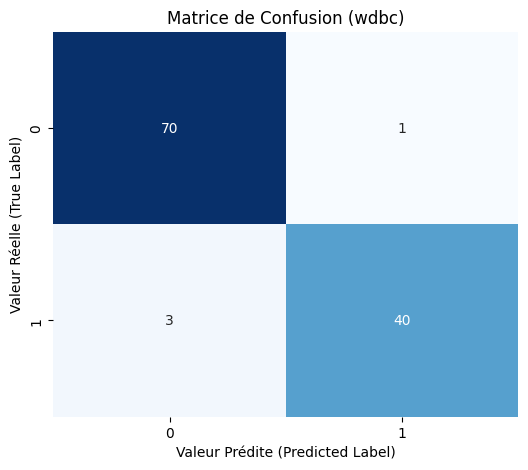

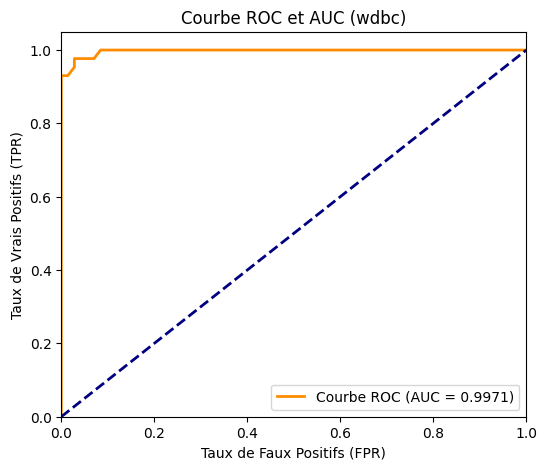

In [9]:
# --- ÉTAPE PRÉALABLE : Charger les données de test (Exemple WDBC) ---
from display_plots import plot_model_diagnostics
from sklearn.model_selection import train_test_split

dataset_name = 'wdbc'
dataset = datasets[dataset_name]

X = dataset.iloc[: , :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_file = './models/wdbc/model_BEST_RandomForest_Accuracy_0.9649.pkl' 
plot_model_diagnostics(
    model_path=model_file, 
    X_test= X_test,
    y_test=y_test, 
    df_name=dataset_name
)

Text(0.5, 1.0, 'Distribution de SalePrice (Originale)')

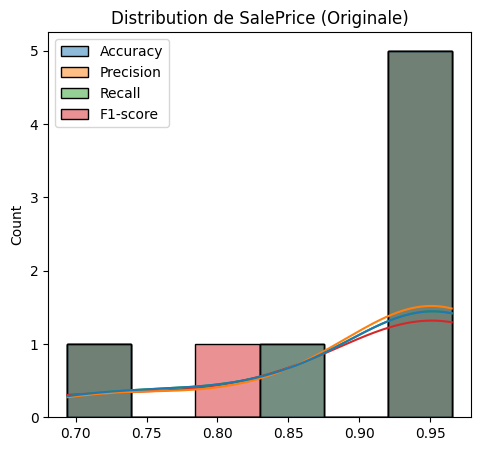

In [ ]:
# Exemple Matplotlib pour la variable cible (y)
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution avant transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(result, kde=True)
plt.title("Distribution de SalePrice (Originale)")

In [ ]:
# # Exemple Plotly pour l'EDA (interactif)
# import plotly.express as px

# # Exemple AmesHousing : Prix par Qualité Générale
# # Assurez-vous que df_train contient 'SalePrice' et 'OverallQual'
# fig = px.box(df_train, x='OverallQual', y='SalePrice', 
#              title="Prix de Vente par Qualité Générale (OverallQual)")
# fig.show()

In [ ]:
# # Exemple Matplotlib/Seaborn
# # X_processed_df est le DataFrame final APRÈS l'encodage et le scaling
# corr_matrix = X_processed_df.corr() 

# plt.figure(figsize=(10, 8))
# # On utilise une sélection des 10 features les plus corrélées à la cible pour la clarté
# k = 10 # Nombre de features à afficher
# cols = corr_matrix.nlargest(k + 1, 'SalePrice')['SalePrice'].index # Si c'est de la régression
# cm = np.corrcoef(X_processed_df[cols].values.T)

# sns.heatmap(cm, 
#             annot=True, # Afficher les valeurs de corrélation
#             fmt='.2f', 
#             cmap='viridis',
#             yticklabels=cols.values, 
#             xticklabels=cols.values)
# plt.title(f"Matrice de Corrélation des {k} Top Features")
# plt.show() #

In [ ]:
# # Exemple avec Random Forest (après l'entraînement)
# from sklearn.ensemble import RandomForestRegressor
# # Assurez-vous d'utiliser X_processed_df pour récupérer les noms de colonnes
# model_rf = RandomForestRegressor(random_state=42)
# # model_rf.fit(X_train_processed, y_train)

# feature_importances = pd.Series(model_rf.feature_importances_, index=X_processed_df.columns)
# feature_importances = feature_importances.nlargest(15)

# plt.figure(figsize=(10, 6))
# feature_importances.plot(kind='barh')
# plt.title("Importance des Caractéristiques (Random Forest)")
# plt.show() #

In [ ]:
# from sklearn.metrics import roc_curve, auc
# # from sklearn.svm import SVC # Exemple de modèle

# # Utiliser le meilleur modèle entraîné (ex: best_svc ou best_rf)
# # y_scores = best_model.decision_function(X_test_processed) # Pour SVM
# # y_scores = best_model.predict_proba(X_test_processed)[:, 1] # Pour modèles probabilistes (RF, LogReg, AdaBoost)

# # fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# # roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('Taux de Faux Positifs (FPR)')
# plt.ylabel('Taux de Vrais Positifs (TPR)')
# plt.title('Courbe ROC (Receiver Operating Characteristic)')
# plt.legend(loc="lower right")
# plt.show() #

In [ ]:
# from sklearn.metrics import confusion_matrix
# # cm = confusion_matrix(y_test, y_pred) # y_pred = prédictions du meilleur modèle

# plt.figure(figsize=(6, 5))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=['Prédit Négatif', 'Prédit Positif'], 
#             yticklabels=['Réel Négatif', 'Réel Positif'])
# plt.ylabel('Valeur Réelle')
# plt.xlabel('Valeur Prédite')
# plt.title('Matrice de Confusion')
# plt.show() #

In [ ]:
# # df_results = pd.DataFrame(results) # Assurez-vous que c'est le DataFrame de vos résultats

# plt.figure(figsize=(10, 6))
# # Si classification:
# sns.barplot(x='Model', y='Accuracy', data=df_results, palette='coolwarm')
# # Si régression: (utiliser RMSE, et peut-être inverser l'axe y ou trier car on cherche le minimum)
# # sns.barplot(x='Model', y='RMSE', data=df_results, palette='coolwarm') 

# plt.title('Comparaison des Modèles (Accuracy)')
# plt.ylim(min(df_results['Accuracy']) * 0.95, 1.0) # Ajuster les limites pour mieux voir les différences
# plt.xticks(rotation=45)
# plt.show()